In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
%matplotlib inline 
import seaborn as sns  

# Two different methods of conducting a t-test
import researchpy as rp
from scipy import stats

In [2]:
data = pd.read_csv("Exams_Analysis.csv")

In [3]:
data.head()

,gender,score
0,M,50
1,F,84
2,M,51
3,M,38
4,F,61


In [4]:
data.gender = data.gender.map(lambda x: x.strip())

In [5]:
#aggregate score columns by computing the count, mean, and variance
df = data.groupby('gender',as_index=False).agg({
                                        'score':['count','mean','var','std']
                                        })
df

gender score                                  
         count       mean         var        std
0      F    76  59.118421  309.972456  17.606035
1      M    69  58.565217  393.896419  19.846824

In [6]:
descriptive_stats = data.groupby("gender")['score'].describe()
descriptive_stats

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
F,76.0,59.118421,17.606035,18.0,47.0,61.0,72.5,94.0
M,69.0,58.565217,19.846824,8.0,44.0,60.0,74.0,92.0


In [7]:
#exporting the descriptive stats to a folder
df.to_csv("descriptive_stats.csv")
descriptive_stats.to_csv("descriptive_statistics.csv")

In [8]:
# Showing descriptive statistics from researchpy.summary_cont()
researchpy_stats = rp.summary_cont(data.groupby("gender")['score'])

In [9]:
researchpy_stats.to_csv("researchpy_stats.csv")

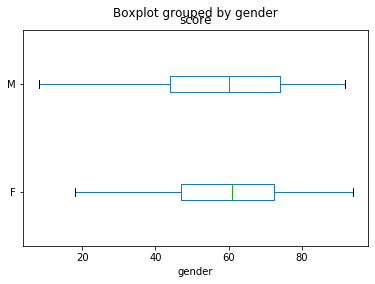

In [10]:
data.boxplot(by ='gender', column =['score'], grid = False, vert= False) 

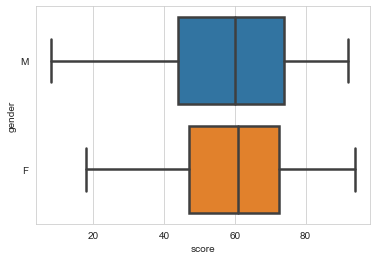

In [29]:
sns.set_style("whitegrid") 
  
sns.boxplot(x = 'score', y = 'gender', linewidth=2.5,data = data) 

In [12]:
from scipy.stats import ttest_ind

In [13]:
male_group = data[data['gender']=='M']
female_group = data[data['gender']=='F']
male_group.shape, female_group.shape

((69, 2), (76, 2))

In [14]:
stat, p = ttest_ind(male_group['score'], female_group['score'])

In [15]:
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Same distributions (fail to reject H0)')
else:
    print('Different distributions (reject H0)')

Statistics=-0.178, p=0.859
Same distributions (fail to reject H0)


In [17]:
descriptives, results = rp.ttest(male_group['score'], female_group['score'])

In [18]:
descriptives

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,score,69.0,58.565217,19.846824,2.389277,53.797490,63.332945
1,score,76.0,59.118421,17.606035,2.019551,55.095270,63.141572
2,combined,145.0,58.855172,18.642089,1.548141,55.795155,61.915190


In [19]:
results

,Independent t-test,results
0,Difference (score - score) =,-0.5532
1,Degrees of freedom =,143.0000
2,t =,-0.1779
3,Two side test p value =,0.8591
4,Difference < 0 p value =,0.4295
5,Difference > 0 p value =,0.5705
6,Cohen's d =,-0.0296
7,Hedge's g =,-0.0294
8,Glass's delta =,-0.0279
9,r =,0.0149


In [20]:
results.to_csv("independent_test.csv")